In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./dataset_diabetes/dataset_diabetes/diabetic_data.csv')
desc = pd.read_csv('./dataset_diabetes/dataset_diabetes/IDs_mapping.csv')

In [3]:
print(data.shape)
data.head(10)

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
admission_type_ids = desc.loc[:7, :]
discharge_disposition_ids = desc.loc[10:39, :]
discharge_disposition_ids.columns = ['discharge_disposition_id', 'description']
admission_source_ids = desc.loc[42:66, :]
admission_type_ids.set_index('admission_type_id', inplace=True)
admission_source_ids.columns = ['admission_source_id', 'description']
discharge_disposition_ids.set_index('discharge_disposition_id', inplace=True)
admission_source_ids.set_index('admission_source_id', inplace=True)
admission_type_ids

,description
admission_type_id,
1,Emergency
2,Urgent
3,Elective
4,Newborn
5,Not Available
6,NaN
7,Trauma Center
8,Not Mapped


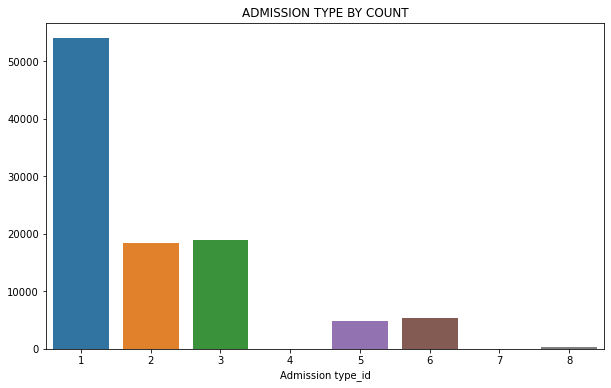

In [6]:
vs = data.admission_type_id.value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x = vs.index, y=vs.values)
plt.title('ADMISSION TYPE BY COUNT')
plt.xlabel('Admission type_id')
plt.show()

In [7]:
discharge_disposition_ids

,description
discharge_disposition_id,
1,Discharged to home
2,Discharged/transferred to another short term h...
3,Discharged/transferred to SNF
4,Discharged/transferred to ICF
5,Discharged/transferred to another type of inpa...
6,Discharged/transferred to home with home healt...
7,Left AMA
8,Discharged/transferred to home under care of H...
9,Admitted as an inpatient to this hospital


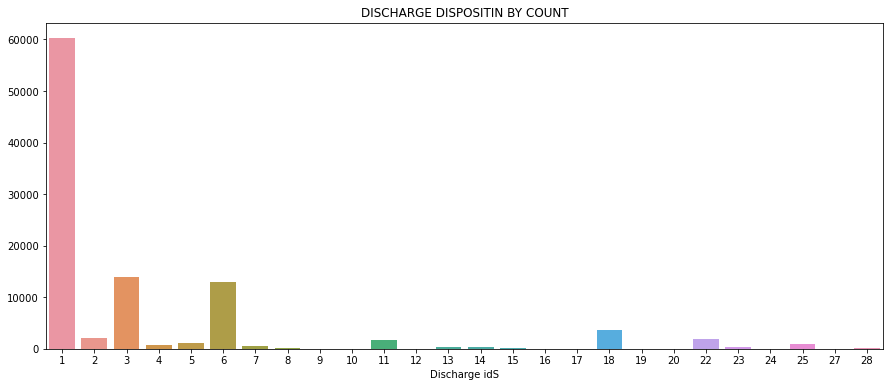

In [8]:
vs = data.discharge_disposition_id.value_counts()
plt.figure(figsize=(15,6))
sns.barplot(x = vs.index, y=vs.values)
plt.title('DISCHARGE DISPOSITIN BY COUNT')
plt.xlabel('Discharge idS')
plt.show()

In [9]:
admission_source_ids

,description
admission_source_id,
1,Physician Referral
2,Clinic Referral
3,HMO Referral
4,Transfer from a hospital
5,Transfer from a Skilled Nursing Facility (SNF)
6,Transfer from another health care facility
7,Emergency Room
8,Court/Law Enforcement
9,Not Available


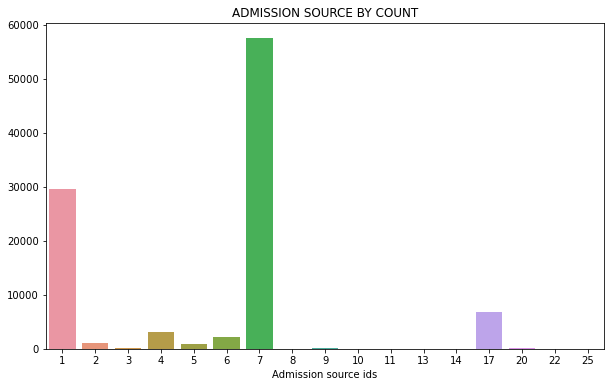

In [10]:
vs = data.admission_source_id.value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x = vs.index, y=vs.values)
plt.title('ADMISSION SOURCE BY COUNT')
plt.xlabel('Admission source ids')
plt.show()

The above figure shows the Null values encoded as id will be replaced with a new value (-1).

### Data cleaning.

1. Transform the categorical columns into integers 

2. Replace the question mark in the categorical columns using np.nan.

3. Using sklearn IterativeImputer to treat the null values.


In [11]:
def repl(x, id):
    if x == id:
        return -1 # np.nan
    else:
        return x

data.loc[:, 'admission_type_id'] = data['admission_type_id'].map(lambda x: repl(x, 6))
data.loc[:, 'discharge_disposition_id'] = data['discharge_disposition_id'].map(lambda x: repl(x, 18))
data.loc[:, 'admission_source_id'] = data['admission_source_id'].map(lambda x: repl(x, 17))

In [14]:
# data.isnull().sum()

In [15]:
data.describe(include=['O']).T

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
max_glu_serum,101766,4,None,96420


In [16]:
data['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [17]:
data['payer_code'].value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [18]:
data['medical_specialty'].value_counts()

?                         49949
InternalMedicine          14635
Emergency/Trauma           7565
Family/GeneralPractice     7440
Cardiology                 5352
                          ...  
Perinatology                  1
SportsMedicine                1
Dermatology                   1
Psychiatry-Addictive          1
Proctology                    1
Name: medical_specialty, Length: 73, dtype: int64

In [19]:
data['diag_1'].value_counts()

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
347       1
133       1
915       1
906       1
217       1
Name: diag_1, Length: 717, dtype: int64

In [20]:
data['diag_2'].value_counts()

276    6752
428    6662
250    6071
427    5036
401    3736
       ... 
990       1
7         1
977       1
884       1
388       1
Name: diag_2, Length: 749, dtype: int64

In [21]:
data['diag_3'].value_counts()

250     11555
401      8289
276      5175
428      4577
427      3955
        ...  
370         1
863         1
E826        1
E955        1
E949        1
Name: diag_3, Length: 790, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute  import IterativeImputer

The null vlues above encoded with '?' will be firt replaced with 'ZZZ' so that, the value will be transform to the last unique value. Then replace the last unique value with (np.nan). 
We then fill the dataframe null values with (-1) for imputation.


In [23]:
data['payer_code'] = data['payer_code'].replace('?', 'ZZZ')
encoder = OrdinalEncoder(dtype='int32')
data.loc[:, 'payer_code'] = encoder.fit_transform(data[['payer_code']])
data['payer_code'].value_counts()

17    40256
7     32439
6      6274
14     5007
0      4655
8      3532
3      2533
15     2448
2      1937
10     1033
12      592
4       549
1       146
16      135
11       95
9        79
13       55
5         1
Name: payer_code, dtype: int64

In [24]:
data['payer_code'] = data['payer_code'].replace(17, np.nan, inplace=False)
data['payer_code'].unique()

array([nan,  7.,  8.,  6., 15.,  0., 14.,  3., 13.,  4.,  2.,  1., 12.,
       16., 11., 10.,  9.,  5.])

In [25]:
data['medical_specialty'] = data['medical_specialty'].replace('?', 'ZZZ')
encoder = OrdinalEncoder(dtype='int32')
data.loc[:, 'medical_specialty'] = encoder.fit_transform(data[['medical_specialty']])
data['medical_specialty'].value_counts()

72    49949
18    14635
8      7565
11     7440
3      5352
      ...  
57        1
46        1
67        1
39        1
42        1
Name: medical_specialty, Length: 73, dtype: int64

In [26]:
data['medical_specialty'] = data['medical_specialty'].replace(72, np.nan)
data['medical_specialty'].unique()

array([37., nan, 18., 11.,  3., 62., 27., 12., 60., 19., 28., 47.,  8.,
       51., 64., 22., 24., 33., 15., 30., 61., 35.,  9., 71., 49., 41.,
       20.,  2., 53., 38., 50., 45., 13., 25., 40., 66., 68., 67., 26.,
       65., 36., 43., 17.,  1., 55.,  0., 63., 39., 34.,  6., 58., 69.,
       29., 48., 59., 44., 14., 46., 23., 70., 52., 32.,  7., 57., 56.,
       16., 31.,  4., 42., 21., 10.,  5., 54.])

In [27]:
data['weight'] = data['weight'].replace('?', 'ZZZ')
encoder = OrdinalEncoder(dtype='int32')
data.loc[:, 'weight'] = encoder.fit_transform(data[['weight']])
data['weight'].value_counts(sort=False)


0        3
1    98569
2       48
3      625
4      145
5       35
6       11
7       97
8      897
9     1336
Name: weight, dtype: int64

In [28]:
data['weight'] = data['weight'].replace(1, np.nan)
data['weight'].unique()

array([nan,  9.,  8.,  2.,  3.,  7.,  4.,  6.,  5.,  0.])

In [29]:
data['diag_1'] = data['diag_1'].replace('?', 'ZZZ')
encoder2 = OrdinalEncoder(dtype='int32')
data.loc[:, 'diag_1'] = encoder2.fit_transform(data[['diag_1']])
last = data['diag_1'].nunique() - 1
data['diag_1'] = data['diag_1'].replace(last, np.nan)

In [30]:
data['diag_2'] = data['diag_2'].replace('?', 'ZZZ')
encoder2 = OrdinalEncoder(dtype='int32')
data.loc[:, 'diag_2'] = encoder2.fit_transform(data[['diag_2']])
last = data['diag_2'].nunique() - 1
data['diag_2'] = data['diag_2'].replace(last, np.nan)

In [31]:
data['diag_3'] = data['diag_3'].replace('?', 'ZZZ')
encoder2 = OrdinalEncoder(dtype='int32')
data.loc[:, 'diag_3'] = encoder2.fit_transform(data[['diag_3']])
last = data['diag_3'].nunique() - 1
data['diag_3'] = data['diag_3'].replace(last, np.nan)

In [32]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [33]:
df = data.fillna(-1)
# df.isnull().sum()

In [34]:
data['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [35]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']


for col in cat_cols:
    df.loc[:, col] = encoder.fit_transform(df[[col]])

### Null values imputation/

In [41]:
train, test = train_test_split(df, test_size=0.3, stratify=df.readmitted)

In [47]:
columns = train.drop('readmitted', axis=1).columns
impute = IterativeImputer(max_iter=100, random_state=2022, missing_values=-1, skip_complete=False, 
                          initial_strategy='most_frequent')

# clean_train = pd.DataFrame(impute.fit_transform(train[columns]), columns=columns)
# clean_test = pd.DataFrame(impute.transform(test[columns]), columns=columns)
clean_df = pd.DataFrame(impute.fit_transform(df[columns]), columns=columns)

In [50]:
# Roundup imputed values in each columns.
col_to_round = ['weight', 'medical_specialty', 'payer_code', 'diag_1', 'diag_2', 'diag_3', 'admission_type_id',
                'discharge_disposition_id', 'admission_source_id']
for col in col_to_round:
    clean_df.loc[:, col] = clean_df[col].round()
clean_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2278392.0,8222157.0,3.0,0.0,0.0,7.0,3.0,25.0,1.0,1.0,8.0,37.0,41.0,0.0,1.0,0.0,0.0,0.0,124.0,187.0,226.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,149190.0,55629189.0,3.0,0.0,1.0,6.0,1.0,1.0,7.0,3.0,7.0,14.0,59.0,0.0,18.0,0.0,0.0,0.0,143.0,79.0,121.0,9.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,64410.0,86047875.0,1.0,0.0,2.0,6.0,1.0,1.0,7.0,2.0,7.0,20.0,11.0,5.0,13.0,2.0,0.0,1.0,454.0,78.0,766.0,6.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,500364.0,82442376.0,3.0,1.0,3.0,6.0,1.0,1.0,7.0,2.0,7.0,17.0,44.0,1.0,16.0,0.0,0.0,0.0,554.0,97.0,248.0,7.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,16680.0,42519267.0,3.0,1.0,4.0,7.0,1.0,1.0,7.0,1.0,8.0,14.0,51.0,0.0,8.0,0.0,0.0,0.0,54.0,24.0,86.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
clean_df.to_csv('clean_diabetes.csv')